## 如何生成服从正态分布的随机数？

### 1. 中心极限定理

0-1均匀分布期望0.5，方差1/12，采样n个0-1分布的xi

```
(sum(xi)-n*0.5)/(sqrt(n)*1/12) = (mean(xi) - 0.5)*sqrt(12*n)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 101.,  101.,   85.,   83.,   92.,  104.,  114.,  102.,   89.,  129.]),
 array([  7.59230214e-04,   1.00612121e-01,   2.00465011e-01,
          3.00317901e-01,   4.00170792e-01,   5.00023682e-01,
          5.99876572e-01,   6.99729463e-01,   7.99582353e-01,
          8.99435243e-01,   9.99288134e-01]),
 <a list of 10 Patch objects>)

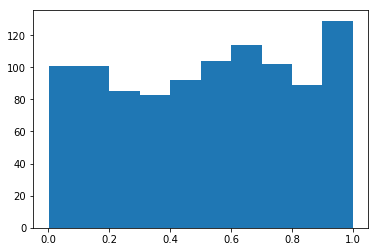

In [2]:
x = np.random.uniform(0,1,1000)
plt.hist(x)

In [3]:
def genNormal_1(sample_size, n):
    sample_list = []
    for i in xrange(sample_size):
        x = (sum(np.random.uniform(0, 1, n)) - 0.5) / (np.sqrt(n)*1/12)
        sample_list.append(x)
    return sample_list

(array([   5.,   18.,   67.,  150.,  213.,  255.,  166.,   86.,   32.,    8.]),
 array([ 48.270084  ,  50.43344766,  52.59681133,  54.76017499,
         56.92353865,  59.08690231,  61.25026598,  63.41362964,
         65.5769933 ,  67.74035697,  69.90372063]),
 <a list of 10 Patch objects>)

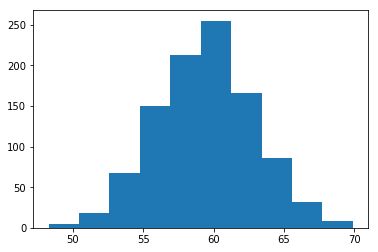

In [4]:
x = genNormal_1(1000, 100)
plt.hist(x)

(array([   8.,   33.,   92.,  188.,  219.,  226.,  138.,   62.,   28.,    6.]),
 array([ 1887.31576268,  1889.37418394,  1891.43260521,  1893.49102647,
         1895.54944774,  1897.60786901,  1899.66629027,  1901.72471154,
         1903.78313281,  1905.84155407,  1907.89997534]),
 <a list of 10 Patch objects>)

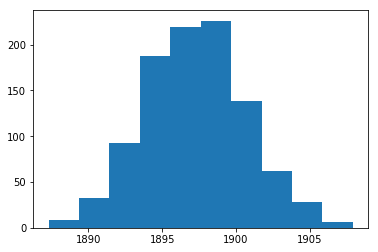

In [5]:
x = genNormal_1(1000, 100000)
plt.hist(x)

### 2. CDF的反函数

scipy.special的erfinv（高斯误差函数反函数）可以当做正态分布CDF的反函数，

```
z = sqrt(2)*f^-1(2*u - 1)
```

In [6]:
from scipy.special import erfinv

def genNormal_2(sample_size):
    sample_list = []
    for i in xrange(sample_size):
        z = np.sqrt(2) * erfinv(2 * np.random.uniform(0, 1) - 1)
        sample_list.append(z)
    return sample_list

(array([  12.,   31.,  123.,  223.,  275.,  212.,   93.,   22.,    8.,    1.]),
 array([-3.14851544, -2.44816121, -1.74780698, -1.04745276, -0.34709853,
         0.3532557 ,  1.05360993,  1.75396416,  2.45431839,  3.15467262,
         3.85502684]),
 <a list of 10 Patch objects>)

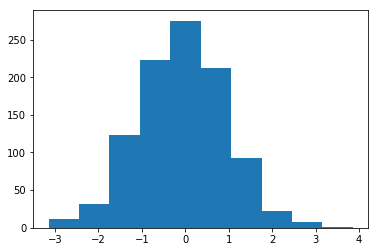

In [7]:
x = genNormal_2(1000)
plt.hist(x)

### 3. Box-Muller变换

In [8]:
def genNormal_3(sample_size):
    sample_list = []
    for i in xrange(sample_size):
        u1 = np.random.uniform(0, 1)
        u2 = np.random.uniform(0, 1)
        z = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
        sample_list.append(z)
    return sample_list

(array([  13.,   62.,  107.,  178.,  225.,  192.,  125.,   72.,   23.,    3.]),
 array([-2.58894399, -2.02797555, -1.46700712, -0.90603869, -0.34507026,
         0.21589818,  0.77686661,  1.33783504,  1.89880347,  2.45977191,
         3.02074034]),
 <a list of 10 Patch objects>)

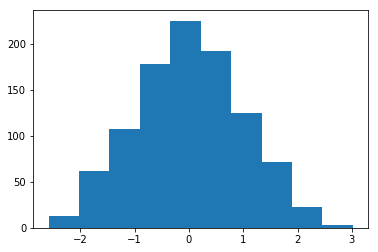

In [9]:
x = genNormal_3(1000)
plt.hist(x)